<a href="https://colab.research.google.com/github/pmantramurti/CMPE257-Fall23-Pranay-Mantramurti/blob/class-activities/LinearRegressionComplete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import numpy as np
import matplotlib.pyplot as plt

In [83]:
import random

## Generates N random points for logistic regression on a line w
def generate_lr(N=20,w0=0,w1=1):
    n = 0
    X1 = []
    Y = []
    while(n < N):
        x1 = random.uniform(-10,10)
        x2 = random.uniform(-1,1)
        y = w0 + w1*x1 + x2
        X1.append(x1)
        Y.append(y)
        n += 1
    data = [np.array([1,X1[i],Y[i]]) for i in range(N)]
    return data

In [84]:
f_w0, f_w1 = 1, 1
N = 50
data = generate_lr(N, f_w0, f_w1)

In [85]:
def abline(slope, intercept, color='b'):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', label = "x_2="+str(slope)+"x_1+"+str(intercept), c=color )

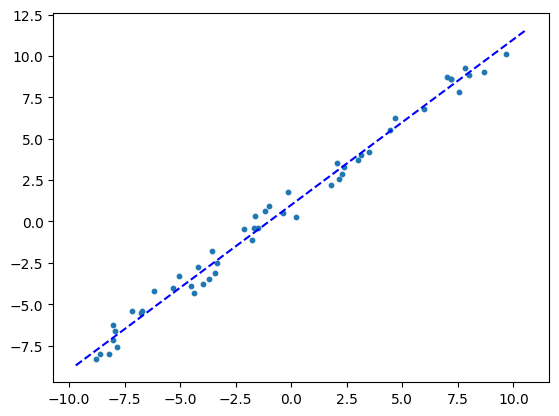

In [86]:
X_1 = [i[1] for i in data]
Y_1  = [i[2] for i in data]
markers = [] #'o' or '+'
colors = [] # 'b' or 'r'
cnt = 0
plt.scatter(X_1,Y_1, s = 10)

abline(f_w1,f_w0)
plt.show()

In [87]:
X = [[i[0], i[1]] for i in data]
Y  = [i[2] for i in data]

In [88]:
def linReg(X,Y, alpha):
  XtX = np.matmul(np.transpose(X), X)
  reg_term = alpha * np.identity(len(X[0]))
  XtX_reg = reg_term + XtX
  XtX_inv = np.linalg.inv(XtX_reg)
  X_pi = np.matmul(XtX_inv, np.transpose(X))
  w = np.matmul(X_pi, Y)
  return w

Plot the final hypothesis with the target and the data points

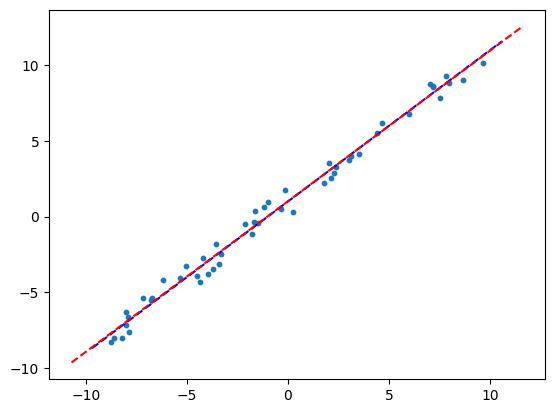

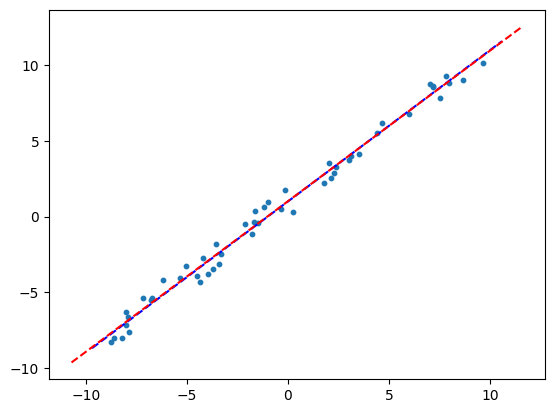

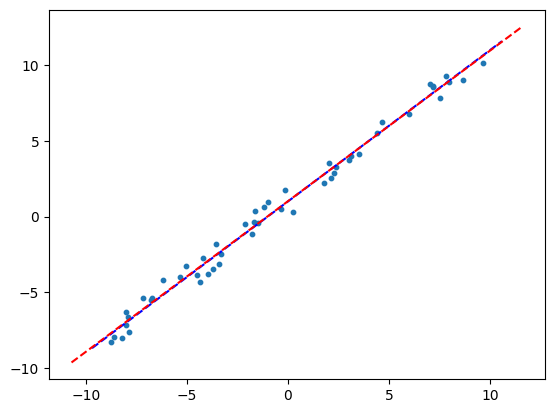

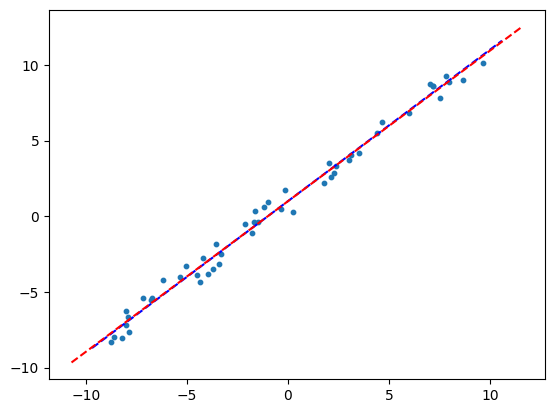

In [89]:
alpha = [0,0.001,0.1,1]
w = []
for a in range(len(alpha)):
  w.append(linReg(X, Y, alpha[a]))
  plt.scatter(X_1,Y, s = 10)
  abline(f_w1,f_w0)
  abline(w[a][1],w[a][0], color='r')
  plt.show()

In [90]:
Y_pred = np.matmul(X, w[0])
np.sum(np.square(Y_pred-Y))

16.967031615599577

In [91]:
w_other = [3, 2]
Y_other = np.matmul(X, w_other)
np.sum(np.square(Y_other-Y))

1556.5139653477675

What about the test data set?

In [92]:
#50 test samples
testdata = generate_lr(50, f_w0, f_w1)
X_test = [[i[0], i[1]] for i in testdata]
Y_test  = [i[2] for i in testdata]
Y_pred_test = np.matmul(X_test, w[0])
np.sum(np.square(Y_pred_test-Y_test))

19.22998331450679

In [93]:
Y_pred_test_target = np.matmul(X_test, [1, 1])
np.sum(np.square(Y_pred_test_target-Y_test))

18.962698149615047

#5 Fold Cross Validation

In [94]:
x = []
y = []
for a in range(0,5):
  x.append([[i[0], i[1]] for ind, i in enumerate(data) if ind%5 == a])
  y.append([i[2] for ind, i in enumerate(data) if ind%5 == a])

In [95]:
for a in range(len(alpha)):
  err_sum = 0
  for i in range(0,5):
    wFFCV = linReg(np.concatenate([j for ind, j in enumerate(x) if ind != i]), np.concatenate([j for ind, j in enumerate(y) if ind != i]), alpha = alpha[a])
    y_pred = np.matmul(x[i], wFFCV)
    err_sum += np.sum(np.square(y_pred - y[i]))
  err_sum = err_sum/5
  print('Error at alpha = ', alpha[a], ' is ', err_sum)

Error at alpha =  0  is  3.9139367680728805
Error at alpha =  0.001  is  3.9139280143170305
Error at alpha =  0.1  is  3.913141665586555
Error at alpha =  1  is  3.912934865375874
